In [35]:
import pandas as pd
import sys
import os
scripts_path = "../scripts"
sys.path.append(scripts_path)


In [36]:

import importlib
import time_analysisss
importlib.reload(time_analysisss)

from time_analysisss import load_data

df = load_data("../data/raw/EW-time table for Upward.csv")



In [37]:
import sys
sys.path.append('../scripts')  # adjust if needed

import importlib
import passenger_flow_utils
importlib.reload(passenger_flow_utils)

from passenger_flow_utils import basic_checks


In [38]:
basic_checks(df)

--- Shape ---
(46, 69)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Stations        46 non-null     object
 1   Stations -code  46 non-null     object
 2   Train times     46 non-null     object
 3   10102           46 non-null     object
 4   10202           46 non-null     object
 5   10302           46 non-null     object
 6   10402           46 non-null     object
 7   10502           46 non-null     object
 8   10602           46 non-null     object
 9   10702           46 non-null     object
 10  10802           46 non-null     object
 11  10104           46 non-null     object
 12  10204           46 non-null     object
 13  10304           46 non-null     object
 14  10404           46 non-null     object
 15  10504           46 non-null     object
 16  10604           46 non-null     object
 17  10704           46 

In [39]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import drop_high_nan_columns

df = drop_high_nan_columns(df, threshold=0.25)


Dropping columns with > 25.0% NaNs: []


In [40]:
# raname columns for better readability
df = df.rename(columns={'Stations -code': 'station_id'})
df = df.rename(columns={'Train times': 'arrival_departure'})
df = df.rename(columns={'Stations ': 'Stations'})



In [41]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import melt_and_pivot_train_schedule

df_pivot = melt_and_pivot_train_schedule(df)


c:\Users\nebiy\OneDrive\Documents\code\Train-Passenger-Flow-Analysis\notebooks\../scripts\time_analysisss.py:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_pivot['Arrival'] = pd.to_datetime(df_pivot['Arrival'], errors='coerce')
c:\Users\nebiy\OneDrive\Documents\code\Train-Passenger-Flow-Analysis\notebooks\../scripts\time_analysisss.py:36: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_pivot['Departure'] = pd.to_datetime(df_pivot['Departure'], errors='coerce')


In [42]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import fill_missing_times_with_station_avg

df_pivot = fill_missing_times_with_station_avg(df_pivot)


In [43]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import calculate_dwell_time
df_pivot = calculate_dwell_time(df_pivot)


In [44]:
basic_checks(df_pivot)

--- Shape ---
(1716, 6)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716 entries, 0 to 1715
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   Stations    1716 non-null   object         
 1   station_id  1716 non-null   object         
 2   train_id    1716 non-null   object         
 3   Arrival     1716 non-null   datetime64[ns] 
 4   Departure   1716 non-null   datetime64[ns] 
 5   Dwell Time  1716 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), object(3), timedelta64[ns](1)
memory usage: 80.6+ KB

--- Null Values ---
arrival_departure
Stations      0
station_id    0
train_id      0
Arrival       0
Departure     0
Dwell Time    0
dtype: int64

--- Descriptive Statistics ---
arrival_departure                        Arrival  \
count                                       1716   
mean               2025-07-29 13:13:10.959480576   
min                          2025-07-29 00:09:39

In [45]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import check_null
check_null(df_pivot)

arrival_departure
Stations      0.0
station_id    0.0
train_id      0.0
Arrival       0.0
Departure     0.0
Dwell Time    0.0
dtype: float64


In [46]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import compute_station_gap_stats

station_stats = compute_station_gap_stats(df_pivot)

Computed station gap stats:
             Stations   Avg_Gap  Min_Gap     Max_Gap    Gap_Std
1         Ayat T10140  4.909604      0.0   15.000000   6.548091
25  Torhailoch T12202  6.274227      0.0   15.000000   7.305804
24  Torhailoch T12201  6.445167      0.0  382.402525  47.431134
14          Megenagna  6.944889      0.0   15.000000   7.226202
2         Ayat T10141  7.466014      0.0   14.000000   5.789348


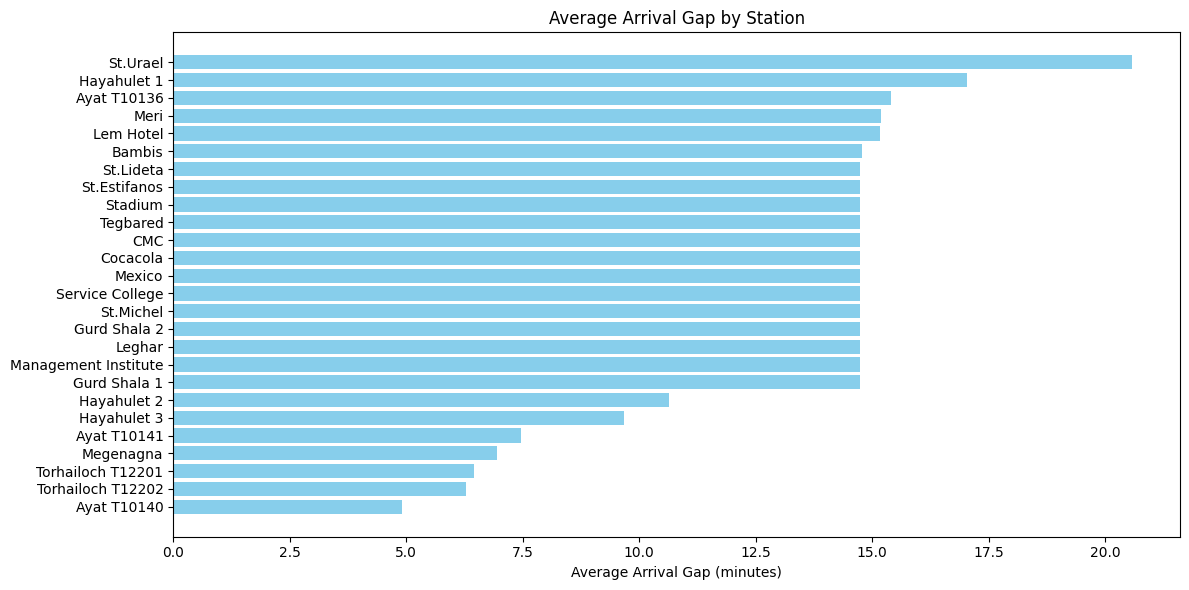

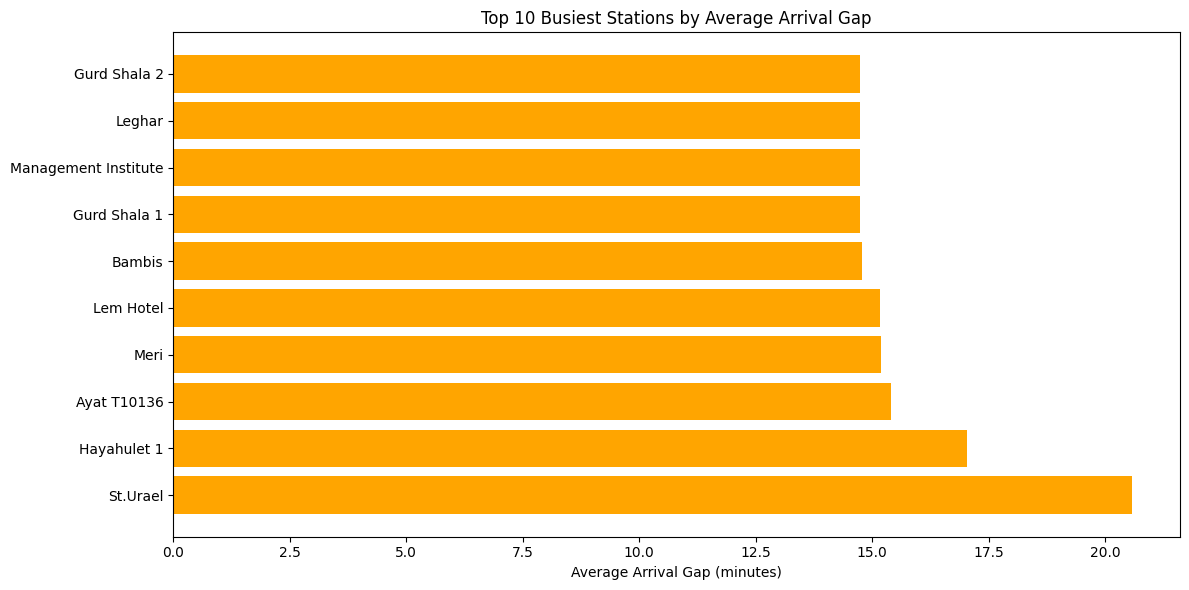

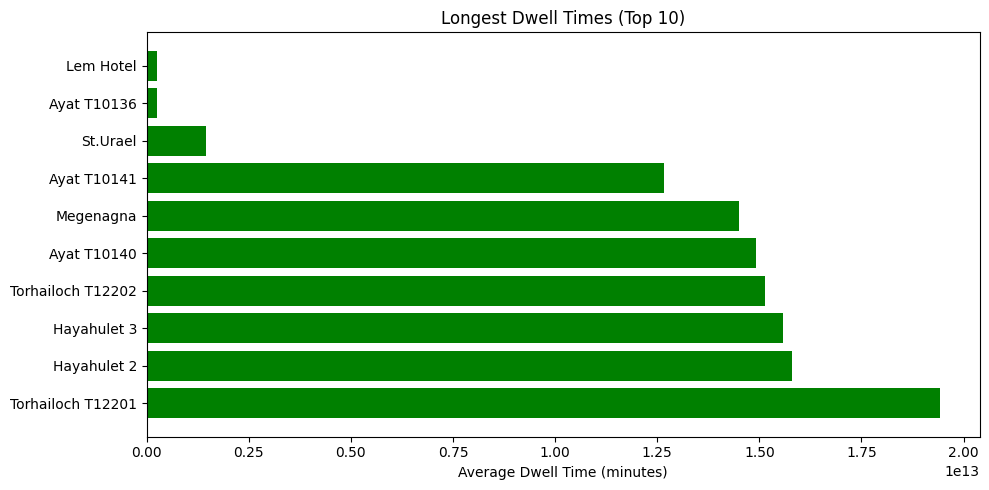

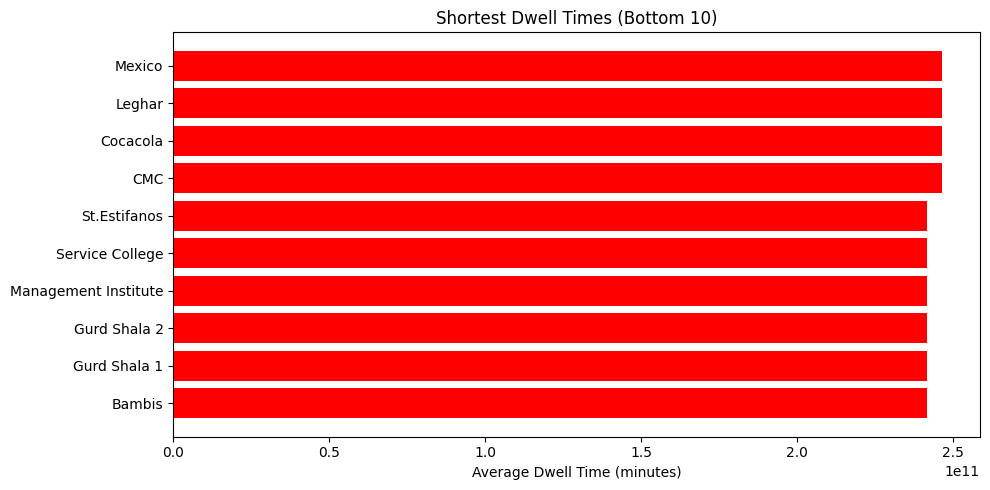

In [47]:
import importlib
import plot_utils  # This must succeed; make sure plot_utils.py is in the same directory or in PYTHONPATH

importlib.reload(plot_utils)

plot_utils.plot_avg_arrival_gap(station_stats)
plot_utils.plot_top_avg_gaps(station_stats)
plot_utils.plot_dwell_time_extremes(df_pivot)


In [48]:
df_pivot.columns

Index(['Stations', 'station_id', 'train_id', 'Arrival', 'Departure',
       'Dwell Time'],
      dtype='object', name='arrival_departure')

In [49]:
df_pivot["Dwell Time"]

0                0 days 00:03:00
1                0 days 00:01:24
2                0 days 00:01:24
3                0 days 00:01:24
4                0 days 00:01:24
                  ...           
1711   0 days 01:11:42.484848384
1712   0 days 00:48:17.515151616
1713   0 days 02:48:17.515151616
1714   0 days 04:48:17.515151616
1715   0 days 06:48:17.515151616
Name: Dwell Time, Length: 1716, dtype: timedelta64[ns]

In [50]:
# PRINT HOW MUCH OF THE DATA IS MISSING
missing_data = df_pivot.isnull().mean() * 100
print(missing_data[missing_data > 0])  # only print columns with missing data

Series([], dtype: float64)


In [51]:
#save df_privot as csv
df_pivot.to_csv('../data/processed/EW_time_table_processed.csv', index=False)